In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
# 데이터 확인 및 전처리

# 2021년 공공자전거 대여 이력 정보

# 데이터 프레임 생성/확인

df1= pd.read_csv('../data/공공자전거 대여이력 정보_2021.01.csv',encoding='cp949',low_memory=False)
df2= pd.read_csv('../data/공공자전거 대여이력 정보_2021.02.csv',encoding='cp949',low_memory=False)
df3=pd.read_csv('../data/공공자전거 대여이력 정보_2021.03.csv',encoding='cp949',low_memory=False)
df4=pd.read_csv('../data/공공자전거 대여이력 정보_2021.04.csv',encoding='cp949',low_memory=False)
df5 =pd.read_csv('../data/공공자전거 대여이력 정보_2021.05.csv',encoding='cp949',low_memory=False)
df6 =pd.read_csv('../data/공공자전거 대여이력 정보_2021.06.csv',encoding='cp949',low_memory=False)

# low_memory = False
# 파일 읽을 때 낮은 메모리 사용을 위한 처리 하지마 --> 큰 데이터 셋 처리시 유용

In [5]:
df6.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,03538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,01843,독산고등학교,0,22.0,1630.0
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,03586,군자역 비채온 오피스텔,0,11.0,1420.0


In [16]:
# 데이터 연결 -> 확인

# concat

df = pd.concat([df1,df2,df3,df4,df5,df6])
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05


In [17]:
# 데이터 크기
df.shape

(13613873, 11)

In [18]:
# 데이터 정보(사용 메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [19]:
# 데이터 전처리
# 불필요한 컬럼 제거 -> 자전거번호, 대여거치대, 반납거치대 제거

df.drop(columns=['자전거번호', '대여거치대', '반납거치대'],inplace=True)


In [20]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05


In [21]:
# 자료형 확인 및 변경

df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [22]:
# object -> category 형 변환( 대여 대여소번호, 반납대여소번호)

df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [24]:
#dateimte 형 변환 : 대여일시, 반납일시

df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'],errors= 'coerce')
#errors= 'coerce' -> 변환 중 에러가 나면 해당 값을 NaT(Not a Time)으로 설정

In [25]:
df.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99


In [27]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

In [28]:
# 결측치 확인 

df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [29]:
# 결측치 제거
df.dropna(inplace=True)

In [30]:
# 결측치 다시 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

In [31]:
# 일별 이용 현황

# 대여 날짜 컬럼 추가 ->date

df['대여일시']

0         2021-01-02 20:50:36
1         2021-01-04 16:02:12
2         2021-01-13 21:02:05
3         2021-01-14 21:02:55
4         2021-01-18 18:02:08
                  ...        
3445939   2021-06-30 22:44:14
3445940   2021-06-30 22:45:19
3445941   2021-06-30 22:43:43
3445942   2021-06-30 22:11:14
3445943   2021-06-30 22:12:10
Name: 대여일시, Length: 13613604, dtype: datetime64[ns]

In [33]:
df['대여날짜'] = df['대여일시'].dt.date
df.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13


In [35]:
# 대여날짜 별 대여건수
# gorupby, to_frame

# 대여날짜 별 대여건수 추출

df.groupby('대여날짜')['대여일시'].count().to_frame()
# 대여날짜 별로 그룹화 진행 후 대여일시를 카운트

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


In [36]:
df_count = df.groupby('대여날짜')['대여일시'].count().to_frame()
# 변수로 지정

In [37]:
df_count.columns = ['대여건수']
df_count.head()
# 열 이름을 바꿈

,대여건수
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819


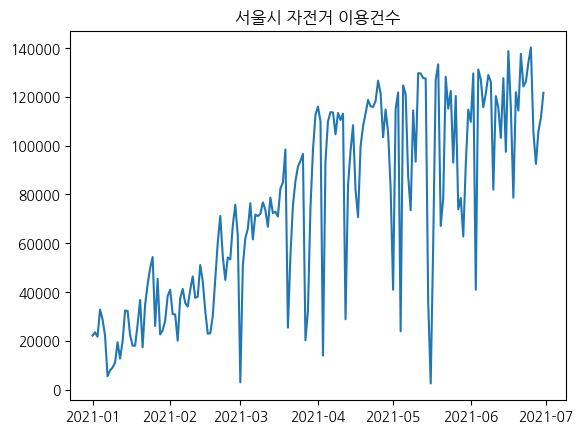

In [38]:
# 데이터 시각화

plt.plot(df_count.index,df_count.values)
plt.title('서울시 자전거 이용건수')
plt.show()

In [42]:
# 대여날짜 별 이용시간

df.groupby('대여날짜')['이용시간'].sum().to_frame()

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


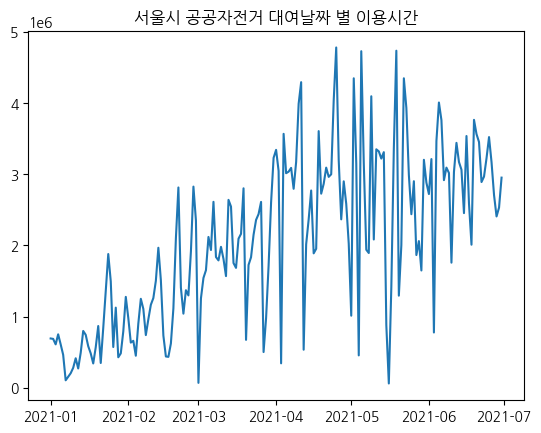

In [43]:
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()

# 시각화

plt.plot(df_time.index, df_time.values)
plt.title('서울시 공공자전거 대여날짜 별 이용시간')
plt.show()

In [44]:
# 대여날짜 별 이용거리

df.groupby('대여날짜')['이용거리'].sum().to_frame()

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


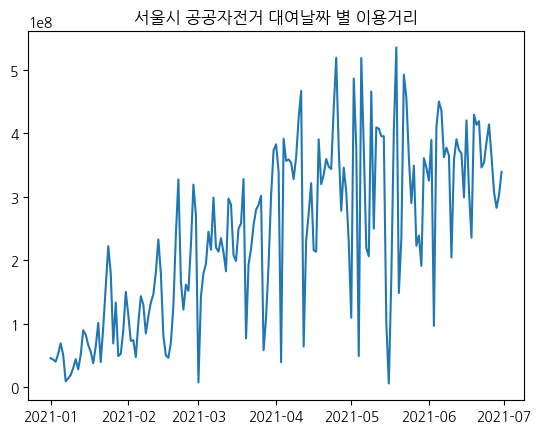

In [45]:
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()

plt.plot(df_distance.index, df_distance.values)
plt.title('서울시 공공자전거 대여날짜 별 이용거리')
plt.show()

In [46]:
pd.concat([df_time,df_distance,df_count],axis= 1)

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


In [47]:
df_date =pd.concat([df_time,df_distance,df_count],axis= 1)
df_date.head()

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,46135287.75,22119
2021-01-02,686580.0,44096180.54,23463
2021-01-03,609571.0,40598300.28,21656
2021-01-04,750721.0,52496452.32,32732
2021-01-05,610227.0,69448557.10,28819


In [49]:
# 시간대 별 대여 및 반납 현황

# 대여시간, 반납시간 컬럼 추가

df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour

In [50]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


In [51]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

In [52]:
# 시간대별 대여 및 반납 현황

df['대여시간'].value_counts()

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [53]:
s_rental=df['대여시간'].value_counts()
s_rental.head()

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
Name: count, dtype: int64

In [55]:
# 대여시간 순으로 정렬
s_rental = s_rental.sort_index()
s_rental

대여시간
0      240025
1      158905
2      103629
3       68710
4       55391
5       84713
6      188920
7      486775
8      808506
9      499995
10     438084
11     537810
12     623065
13     667237
14     725175
15     816040
16     934211
17    1178279
18    1432779
19     984476
20     825031
21     770378
22     643611
23     341859
Name: count, dtype: int64

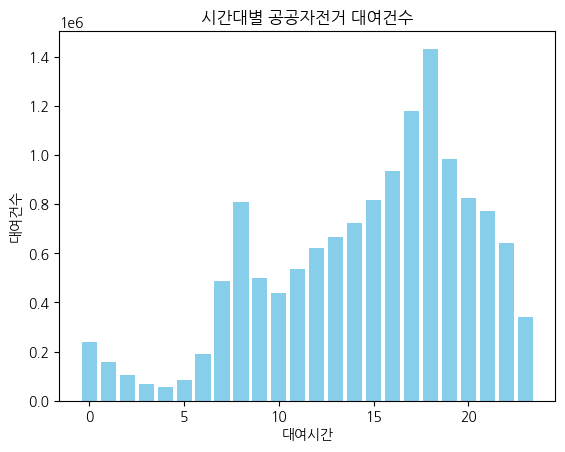

In [57]:
# 시간대별 시각화

x = s_rental.index
y = s_rental.values

plt.bar(x,y,color= 'skyblue')
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

In [58]:
# 대여소별 대여 및 반납 현황
# 대여소 현황

# 대여 대여소번호 개수

df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [59]:
# 반납대여소번호 개수
df['반납대여소번호']

# 밑에 00126,00437 이런 앞에 00이 문제

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [62]:
# 밑에 00126,00437 이런 앞에 00이 문제 해결

# 데이터 타입(형) 변환
# 반납대여소 번호 처리(str변환)

df['반납대여소번호'] = df['반납대여소번호'].astype(str)
df['반납대여소번호']

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: object

In [64]:
#반납대여소 번호 처리( 왼쪽의  0 제거)
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')
df['반납대여소번호']

# 위의 str로 바꾼이유 = lstrip처럼 전처리를 하기위해서는 str로 바꿔야한다

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: object

In [65]:
# 반납대여소 번호처리 (int 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df['반납대여소번호'] 


0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, object): ['10', '1001', '1002', '1003', ..., '9998', '9999', '99997', '99999']

In [67]:
# 대여건수가 가장 많은 대여소 베스트 10 선정
df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,count
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


In [68]:
# 반납건수가 가장 많은 대여소 베스트 10 선정

df[['반납대여소번호','반납대여소명']].value_counts()[:10].to_frame()


,,count
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


In [71]:
# 여의나루역 1번출구 앞 대여소 이용현황

# 서브셋 만들기
condition = df['대여 대여소번호'] == 207
df[condition]

df_207 = df[condition]

In [72]:
# 반납현황
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,count
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
4768,서울도시건축전시관,1
469,회현역 1번출구,1
4673,골드제련앞,1


In [76]:
# 요일별 대여 현황

df_207['대여일시'].dt.strftime('%a')

df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

df_207.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_36148\4005843043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri


In [77]:
df_207['대여요일'].value_counts()

대여요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: count, dtype: int64

In [82]:
# 이용시간 통계
print("평균:", df_207['이용시간'].mean())
print("최대:", df_207['이용시간'].max())
print("최소:", df_207['이용시간'].min())


평균: 50.28551344300312
최대: 1268.0
최소: 1.0


In [83]:
df['이용시간'].mean()

27.27823322905529